# Check TVC forcing files

Downloaded from https://github.com/V-Dutch/TVCSnowCLM the 13/11/2024 by Mickaël Lalande

- Article (Dutch et al., 2022) : https://tc.copernicus.org/articles/16/4201/2022/

CLASSIC forcing: https://cccma.gitlab.io/classic/basicInputs.html

In [1]:
# Env: sc2_v0

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures

In [2]:
path = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/TVC/TVCSnowCLM/TVCMetData/CLMInputData'

## Umiujaq tundra, northeastern Canada

In [3]:
ds = xr.open_mfdataset(path+'/*.nc')
ds.load()

<xarray.Dataset> Size: 7MB
Dimensions:   (time: 61320, scalar: 1, lat: 1, lon: 1)
Coordinates:
  * time      (time) object 491kB 2013-01-01 00:00:00 ... 2019-12-31 23:00:00...
Dimensions without coordinates: scalar, lat, lon
Data variables: (12/14)
    EDGEN     (time, scalar) float64 491kB 68.5 68.5 68.5 ... 68.5 68.5 68.5
    EDGES     (time, scalar) float64 491kB 68.4 68.4 68.4 ... 68.4 68.4 68.4
    EDGEW     (time, scalar) float64 491kB 226.7 226.7 226.7 ... 226.7 226.7
    EDGEE     (time, scalar) float64 491kB 226.8 226.8 226.8 ... 226.8 226.8
    LATIXY    (time, lat) float64 491kB 68.75 68.75 68.75 ... 68.75 68.75 68.75
    LONGXY    (time, lon) float64 491kB 226.5 226.5 226.5 ... 226.5 226.5 226.5
    ...        ...
    TBOT      (time, lat, lon) float64 491kB 254.3 253.9 253.7 ... 249.8 250.1
    RH        (time, lat, lon) float64 491kB 85.0 85.0 84.0 ... 79.0 79.0 79.0
    WIND      (time, lat, lon) float64 491kB 4.167 4.167 3.056 ... 3.333 3.333
    PSRF      (time, lat, lon) float64 491kB 1.006e+05 1.007e+05 ... 9.874e+04
    FSDS      (time, lat, lon) float64 491kB 1e-10 1e-10 1e-10 ... 1e-10 1e-10
    ZBOT      (time, lat, lon) float64 491kB 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0
Attributes:
    Location:     Field site located at Latitude:68.75 Longitude:226.50
    History:      File created by V. R. Dutch in Dec 2020 using TVC Station d...
    Institution:  Northumbria University, UK

In [4]:
ds = ds.squeeze()

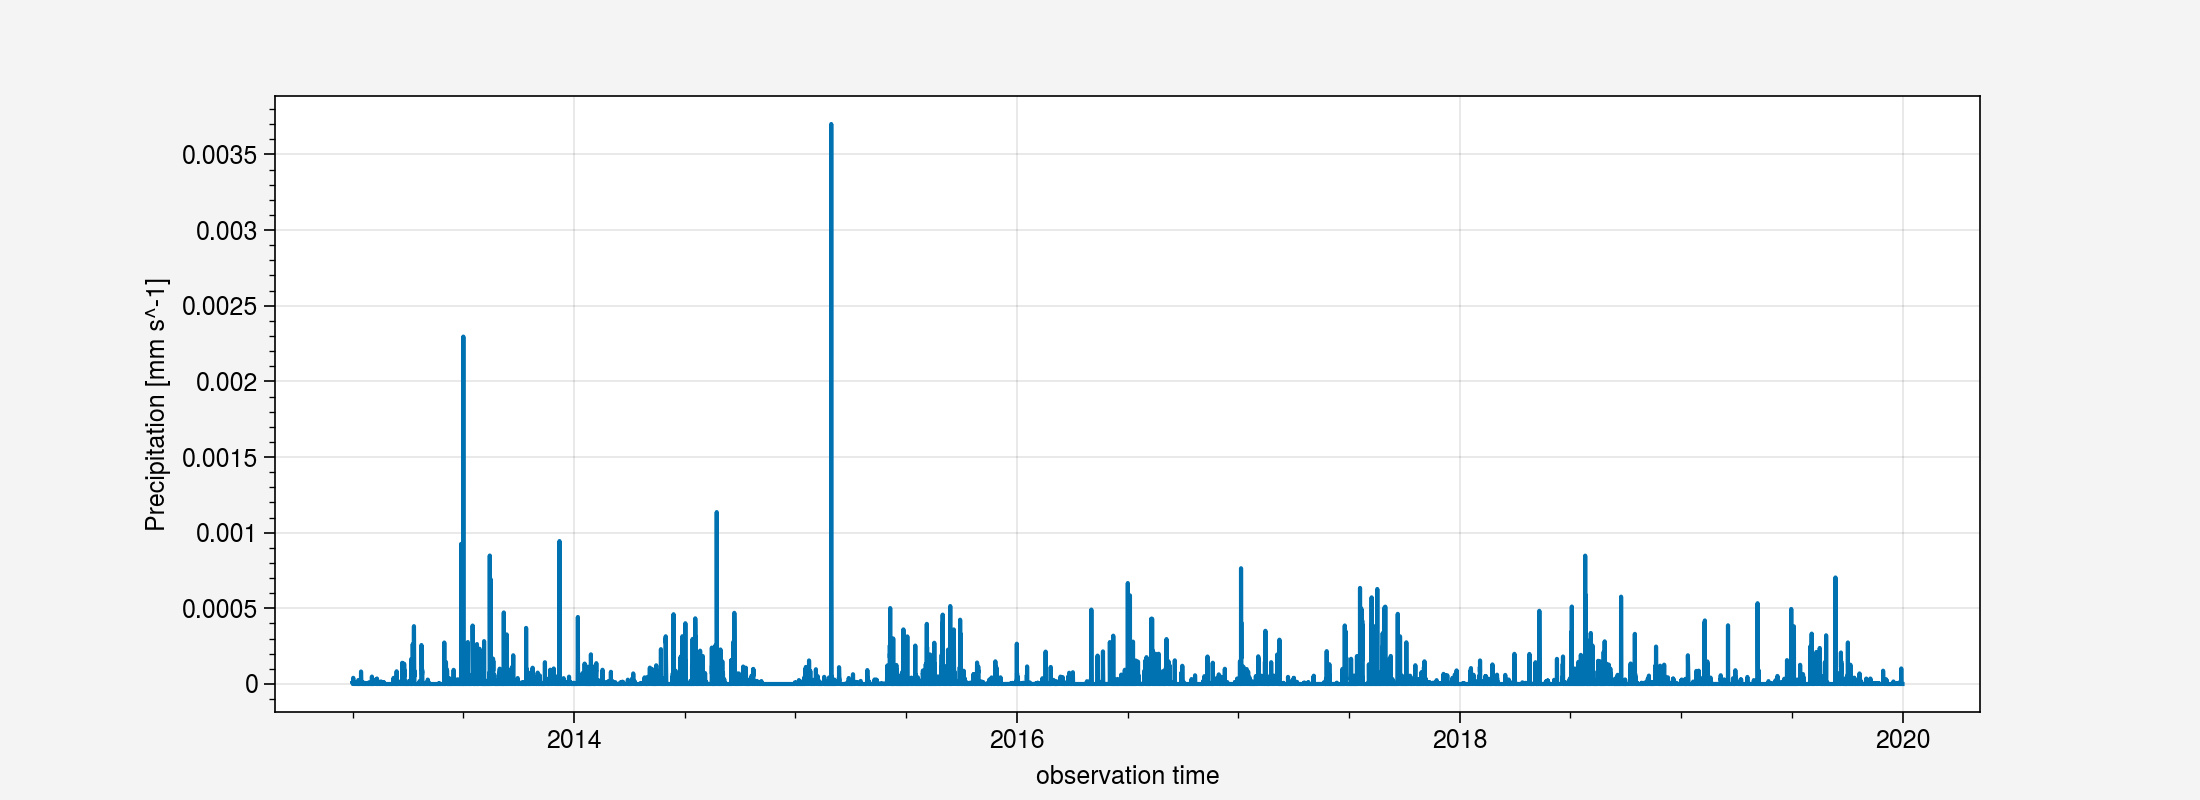

In [6]:
%matplotlib inline
ds.PRECTmms.plot(figsize=(11,4))

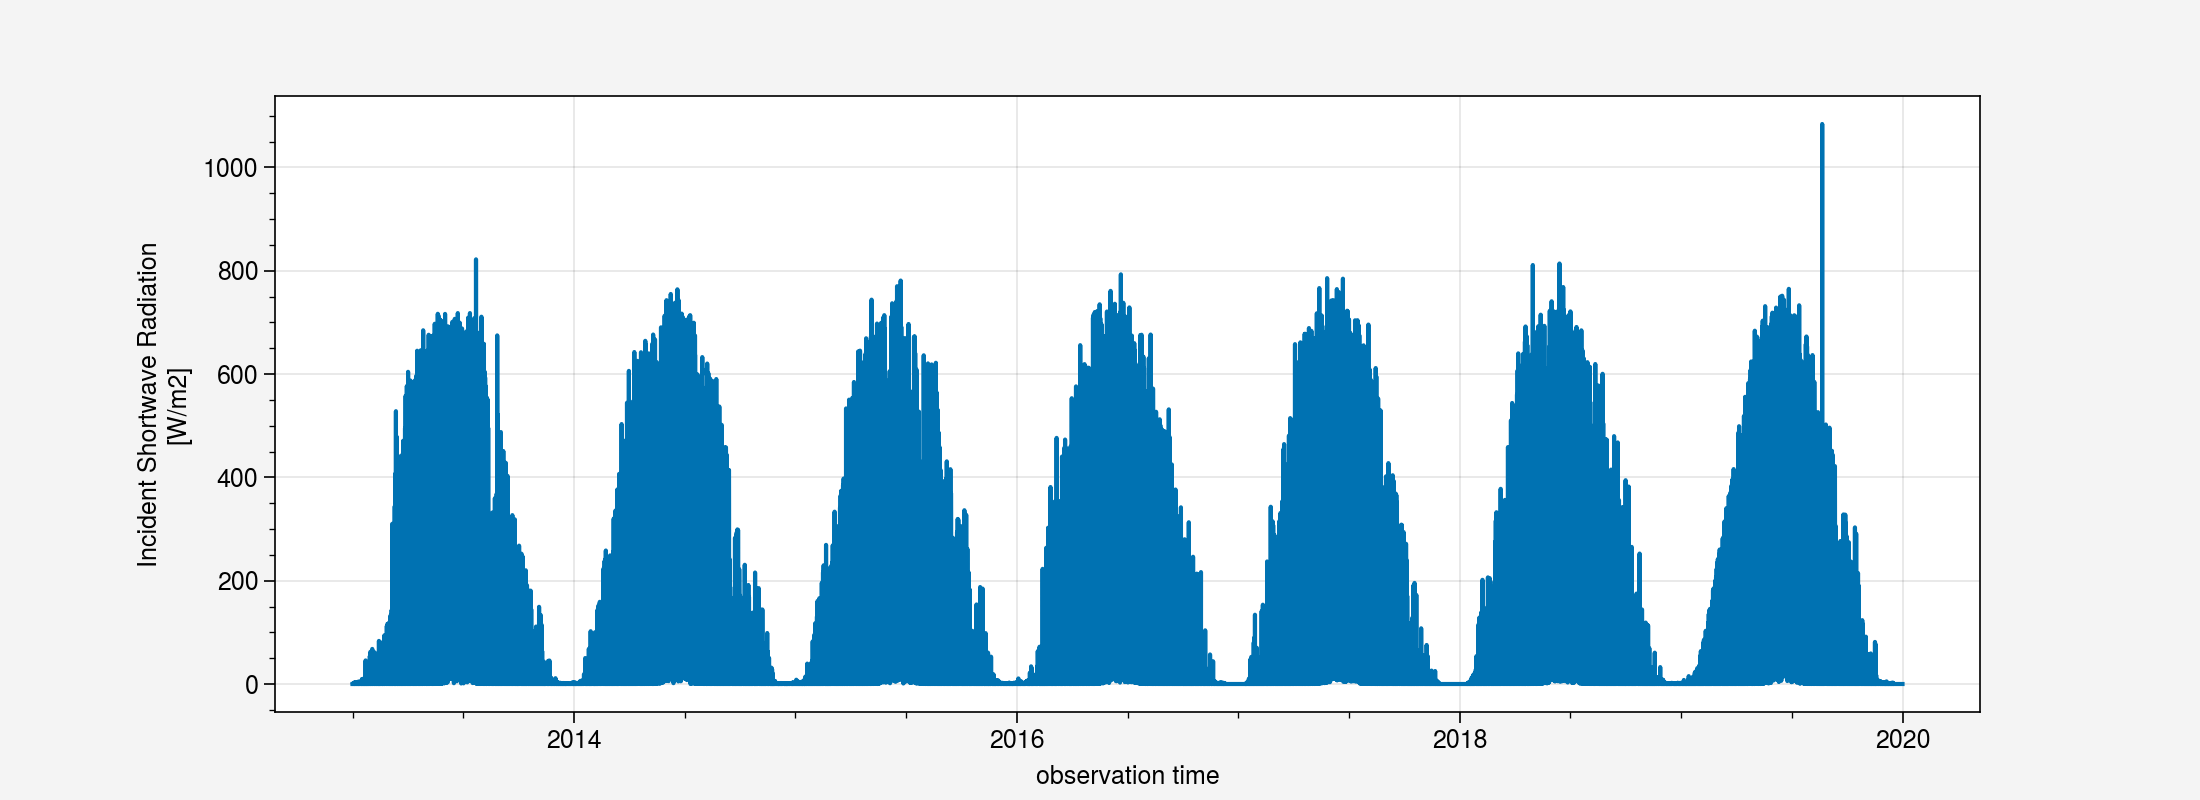

In [7]:
%matplotlib inline
ds.FSDS.plot(figsize=(11,4))

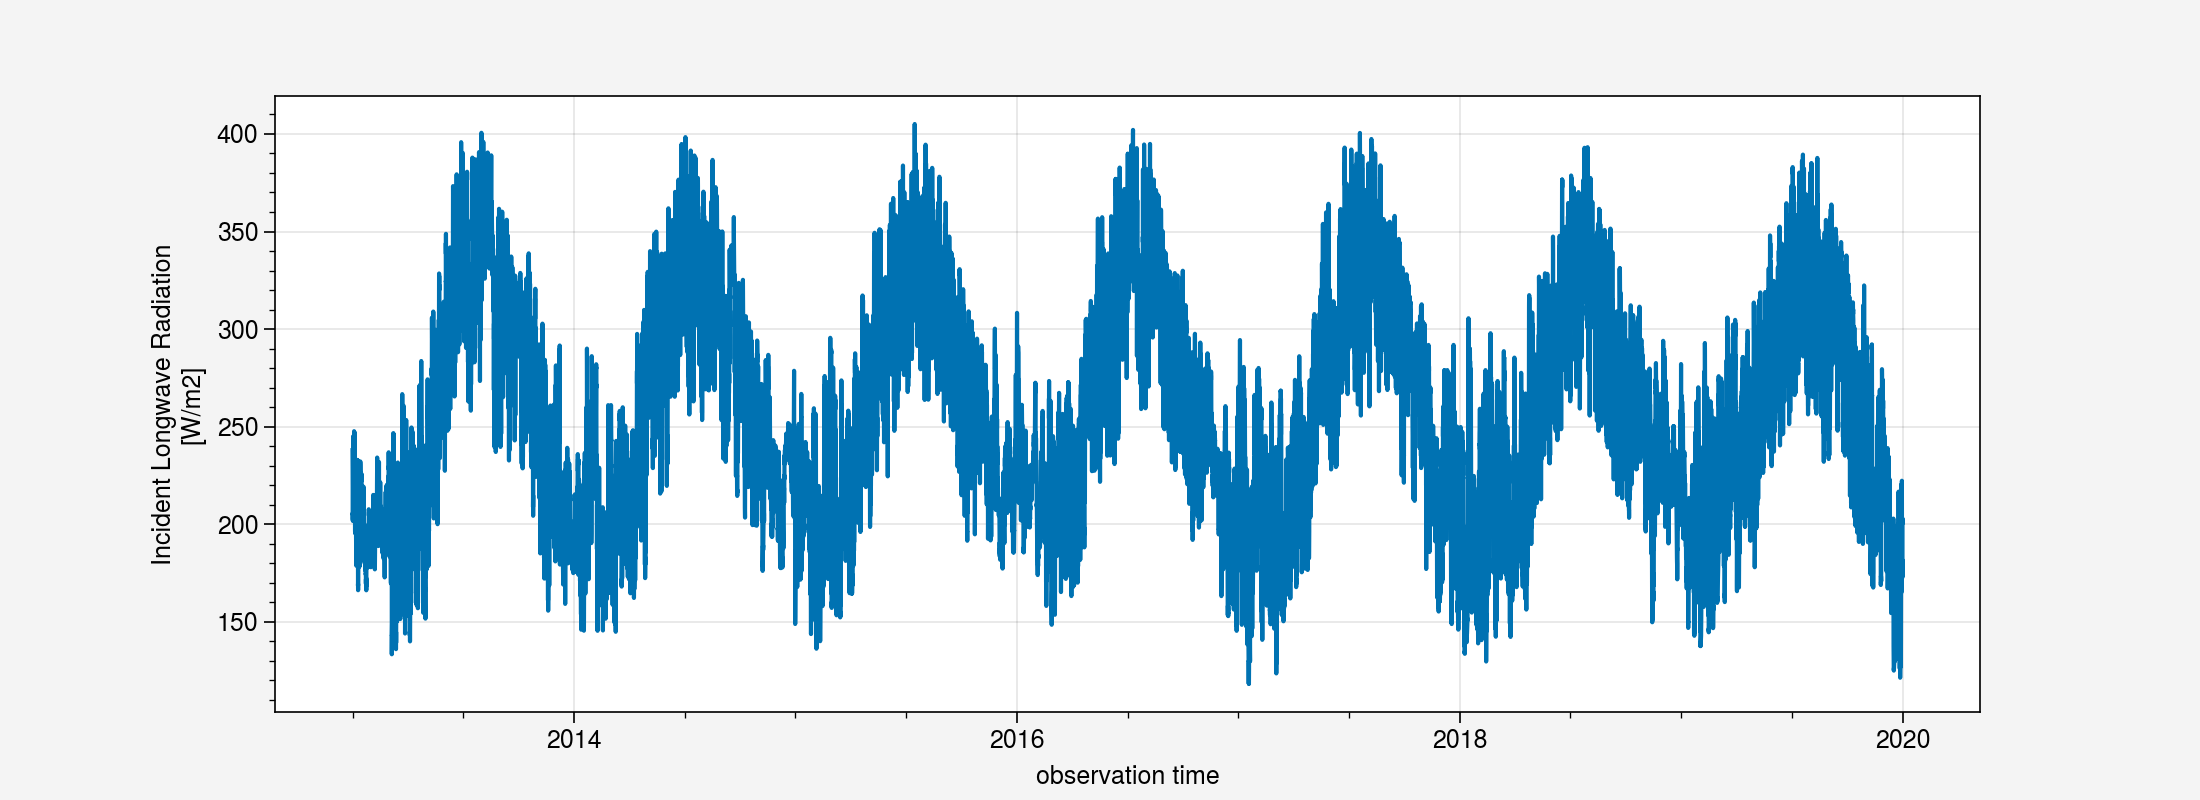

In [8]:
%matplotlib inline
ds.FLDS.plot(figsize=(11,4))

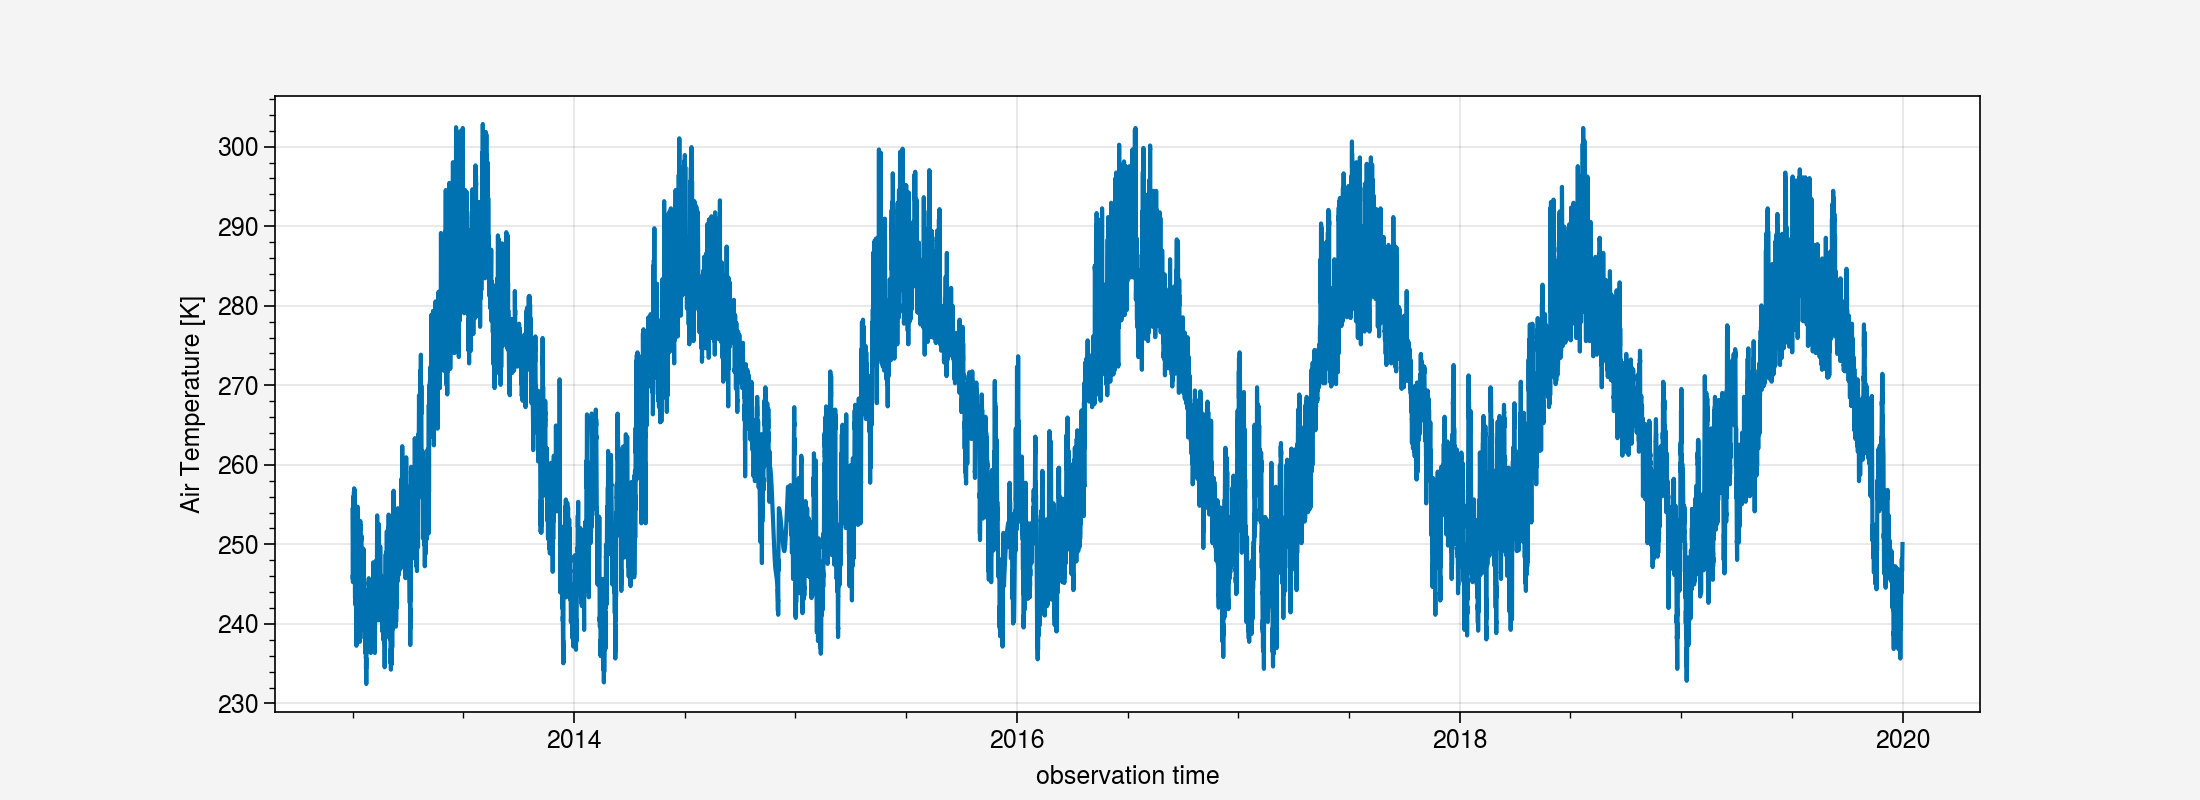

In [9]:
%matplotlib inline
ds.TBOT.plot(figsize=(11,4))

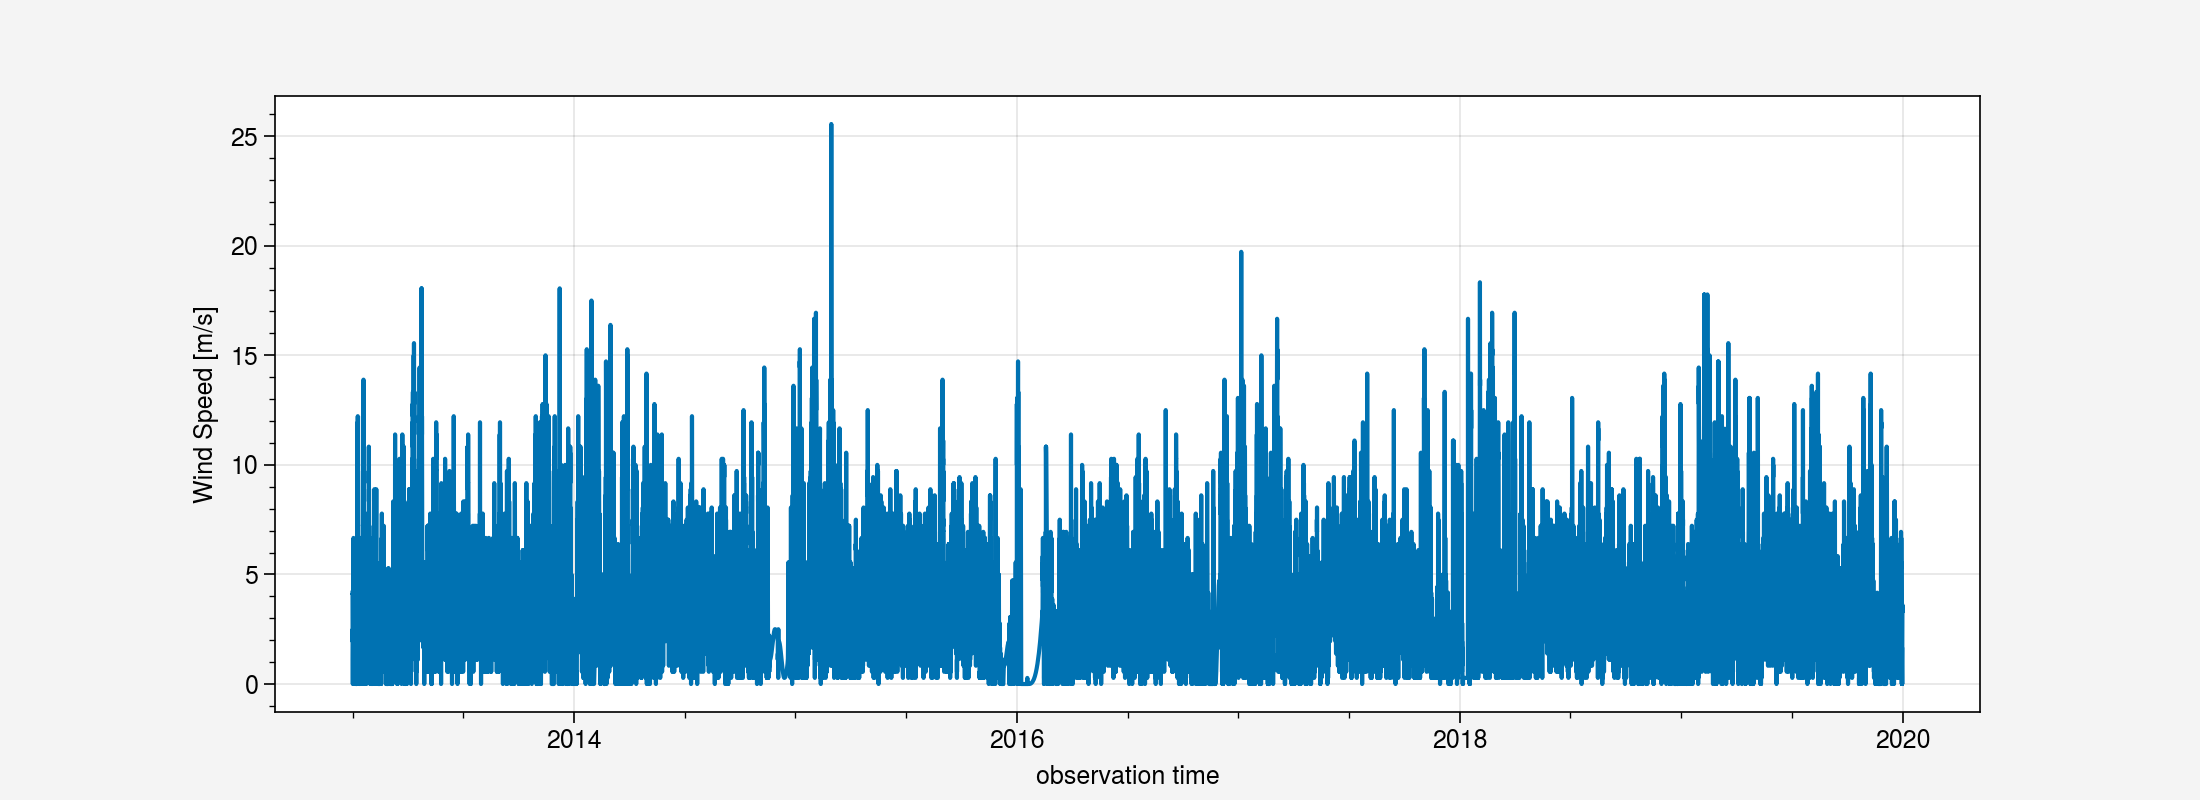

In [10]:
%matplotlib inline
ds.WIND.plot(figsize=(11,4))

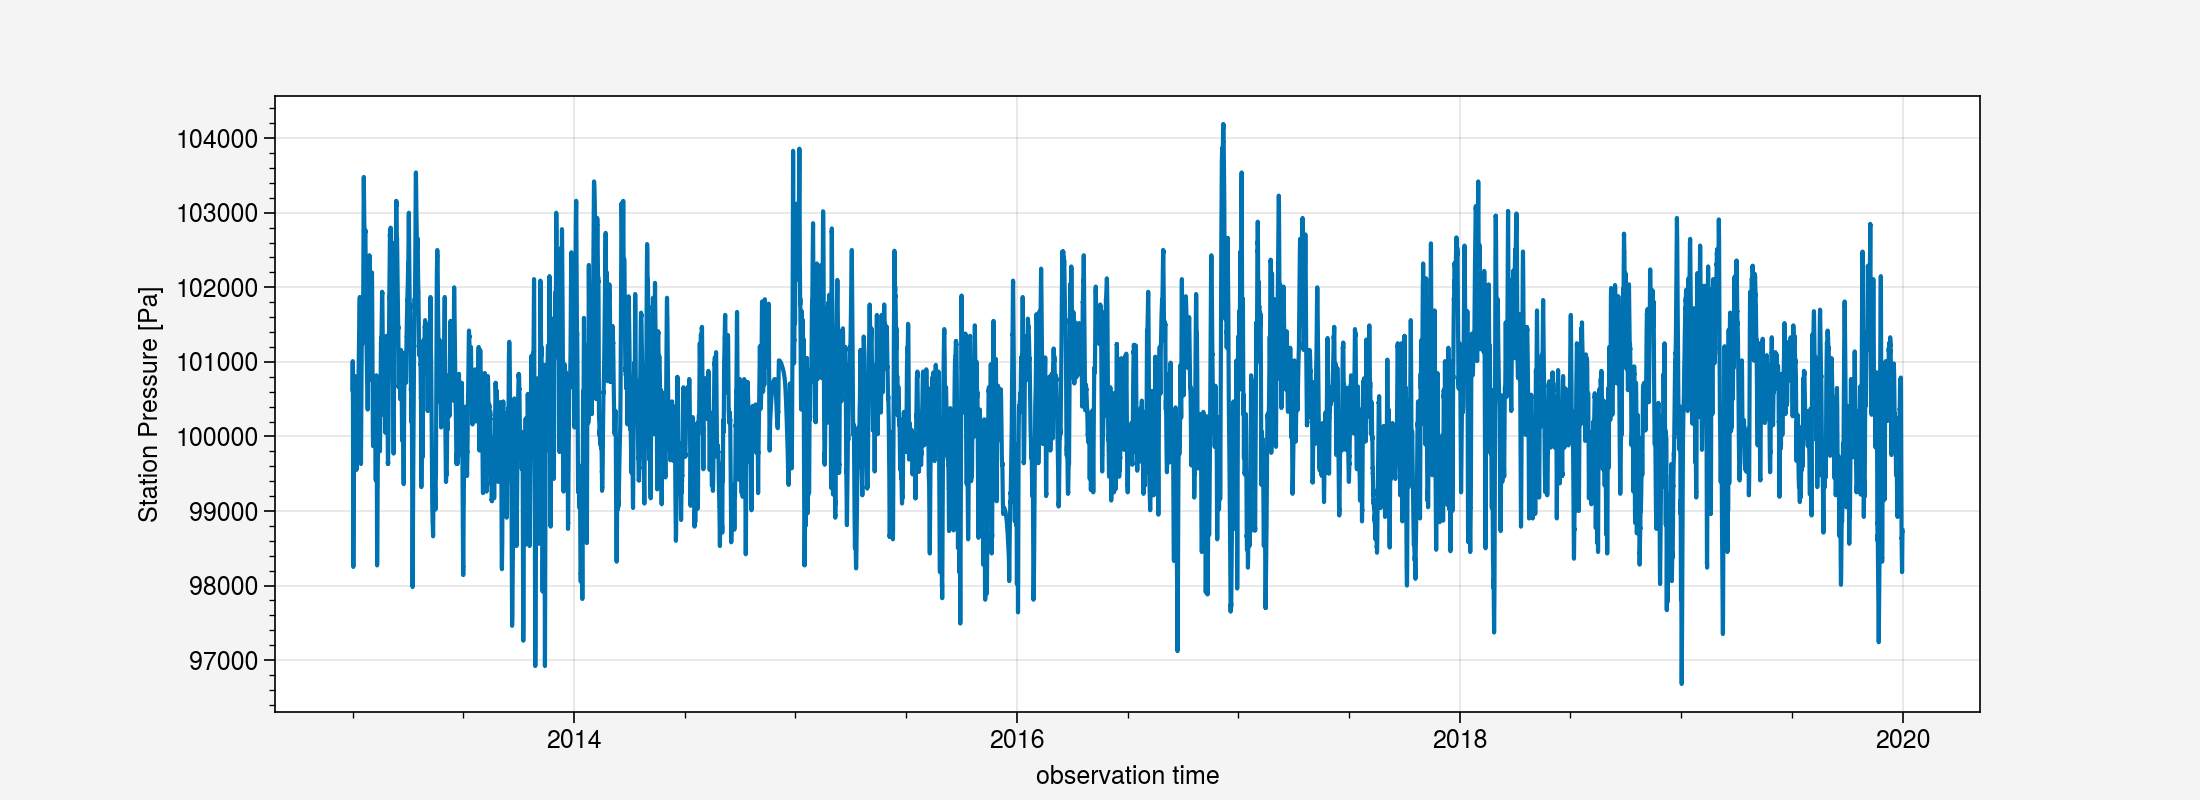

In [11]:
%matplotlib inline
ds.PSRF.plot(figsize=(11,4))

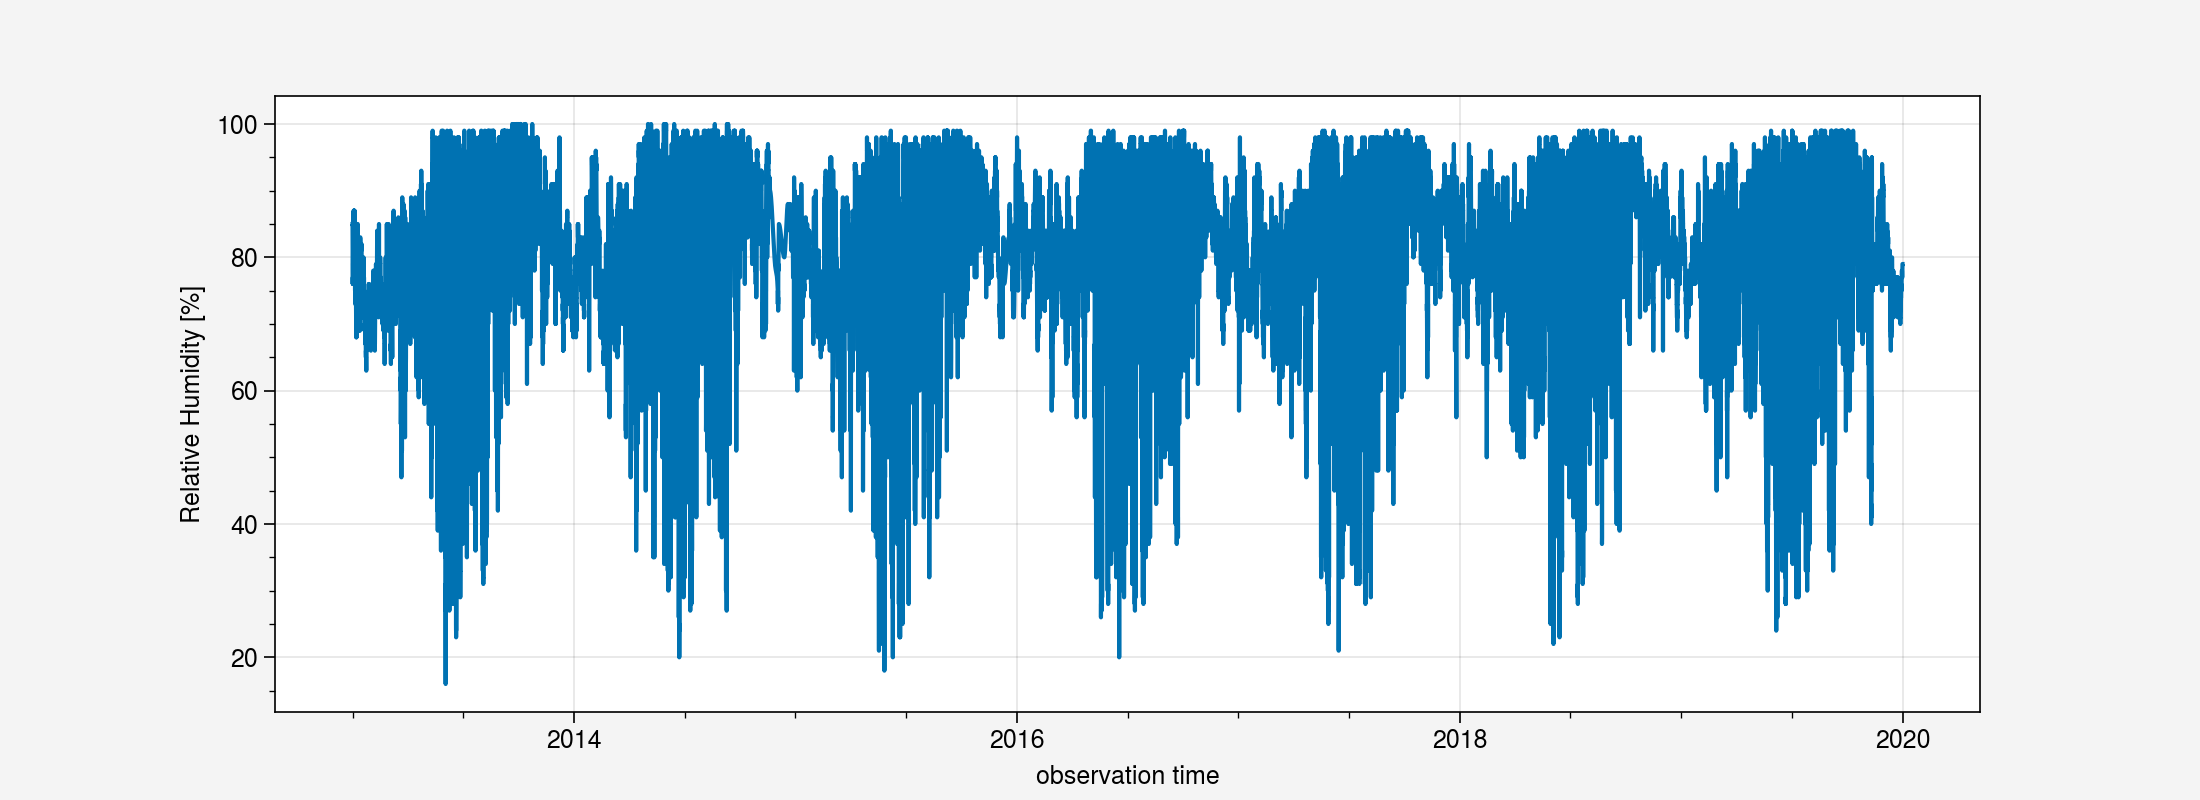

In [30]:
%matplotlib inline
ds.RH.plot(figsize=(11,4))

In [13]:
ds

<xarray.Dataset> Size: 7MB
Dimensions:   (time: 61320)
Coordinates:
  * time      (time) object 491kB 2013-01-01 00:00:00 ... 2019-12-31 23:00:00...
Data variables: (12/14)
    EDGEN     (time) float64 491kB 68.5 68.5 68.5 68.5 ... 68.5 68.5 68.5 68.5
    EDGES     (time) float64 491kB 68.4 68.4 68.4 68.4 ... 68.4 68.4 68.4 68.4
    EDGEW     (time) float64 491kB 226.7 226.7 226.7 226.7 ... 226.7 226.7 226.7
    EDGEE     (time) float64 491kB 226.8 226.8 226.8 226.8 ... 226.8 226.8 226.8
    LATIXY    (time) float64 491kB 68.75 68.75 68.75 68.75 ... 68.75 68.75 68.75
    LONGXY    (time) float64 491kB 226.5 226.5 226.5 226.5 ... 226.5 226.5 226.5
    ...        ...
    TBOT      (time) float64 491kB 254.3 253.9 253.7 253.4 ... 249.8 249.8 250.1
    RH        (time) float64 491kB 85.0 85.0 84.0 84.0 ... 78.0 79.0 79.0 79.0
    WIND      (time) float64 491kB 4.167 4.167 3.056 3.056 ... 3.611 3.333 3.333
    PSRF      (time) float64 491kB 1.006e+05 1.007e+05 ... 9.874e+04 9.874e+04
    FSDS      (time) float64 491kB 1e-10 1e-10 1e-10 1e-10 ... 1e-10 1e-10 1e-10
    ZBOT      (time) float64 491kB 2.0 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0 2.0
Attributes:
    Location:     Field site located at Latitude:68.75 Longitude:226.50
    History:      File created by V. R. Dutch in Dec 2020 using TVC Station d...
    Institution:  Northumbria University, UK

### Convert to SnowMIP format

In [14]:
ds_forcing = ds.copy()

ds_forcing = ds_forcing.rename({
    'PRECTmms': 'TotPrecip', # kg m^{-2) s^{-1)
    'FSDS': 'SWdown', 
    'FLDS': 'LWdown', 
    'TBOT': 'Tair', # K to change to °C
    'RH': 'RH', # # RH to specific huimidity in kg/kg (as expected by CLASSIC)
    'PSRF': 'Psurf', # Pa 
    'WIND': 'Wind'
})

ds_forcing = ds_forcing.drop_vars({'EDGEN', 'EDGES', 'EDGEW', 'EDGEE', 'LATIXY', 'LONGXY', 'ZBOT'})

ds_forcing

<xarray.Dataset> Size: 4MB
Dimensions:    (time: 61320)
Coordinates:
  * time       (time) object 491kB 2013-01-01 00:00:00 ... 2019-12-31 23:00:0...
Data variables:
    LWdown     (time) float64 491kB 238.0 236.7 234.7 ... 199.7 203.0 200.9
    TotPrecip  (time) float64 491kB 7.936e-06 7.137e-06 7.346e-06 ... 0.0 0.0
    Tair       (time) float64 491kB 254.3 253.9 253.7 ... 249.8 249.8 250.1
    RH         (time) float64 491kB 85.0 85.0 84.0 84.0 ... 78.0 79.0 79.0 79.0
    Wind       (time) float64 491kB 4.167 4.167 3.056 ... 3.611 3.333 3.333
    Psurf      (time) float64 491kB 1.006e+05 1.007e+05 ... 9.874e+04 9.874e+04
    SWdown     (time) float64 491kB 1e-10 1e-10 1e-10 ... 1e-10 1e-10 1e-10
Attributes:
    Location:     Field site located at Latitude:68.75 Longitude:226.50
    History:      File created by V. R. Dutch in Dec 2020 using TVC Station d...
    Institution:  Northumbria University, UK

In [15]:
# Replace time by usuable datetime one (removing leap days)
time_range = pd.date_range(start='2013-01-01 00:00:00', end='2019-12-31 23:00:00', freq='H')
ds_forcing['time'] = time_range[~((time_range.month == 2) & (time_range.day == 29))]
ds_forcing

<xarray.Dataset> Size: 4MB
Dimensions:    (time: 61320)
Coordinates:
  * time       (time) datetime64[ns] 491kB 2013-01-01 ... 2019-12-31T23:00:00
Data variables:
    LWdown     (time) float64 491kB 238.0 236.7 234.7 ... 199.7 203.0 200.9
    TotPrecip  (time) float64 491kB 7.936e-06 7.137e-06 7.346e-06 ... 0.0 0.0
    Tair       (time) float64 491kB 254.3 253.9 253.7 ... 249.8 249.8 250.1
    RH         (time) float64 491kB 85.0 85.0 84.0 84.0 ... 78.0 79.0 79.0 79.0
    Wind       (time) float64 491kB 4.167 4.167 3.056 ... 3.611 3.333 3.333
    Psurf      (time) float64 491kB 1.006e+05 1.007e+05 ... 9.874e+04 9.874e+04
    SWdown     (time) float64 491kB 1e-10 1e-10 1e-10 ... 1e-10 1e-10 1e-10
Attributes:
    Location:     Field site located at Latitude:68.75 Longitude:226.50
    History:      File created by V. R. Dutch in Dec 2020 using TVC Station d...
    Institution:  Northumbria University, UK

## Convert RH to Qair

3.3 Specific humidity


Many models use specific humidity rather than RH relative to water as input variable, and we therefore also provide that variable in grams of water per kilogram of moist air. To calculate the partial pressure of water vapor, we used Eq. (17) of Huang (2018). We used PV = nRT for the gas equation of state, where P is pressure, V the volume considered, n the number of moles in V, R the gas constant and T temperature. Values used in the calculations are 18.01528 g for the molar mass of water, 8.3145 J K−1 mol−1 for R and 28.9647 g for the molar mass of dry air. The humidity time series are shown in Fig. 2.

- https://planetcalc.com/2167/
- https://planetcalc.com/2161/
- https://en.wikipedia.org/wiki/Density_of_air
- https://earthscience.stackexchange.com/questions/2360/how-do-i-convert-specific-humidity-to-relative-humidity

In [16]:
def compute_es(T, method='Huang2018', water_only=False):
    """
        Compute the saturation vapor pressure [Pa] from the air temperature [°C].
        Use improved formulas for negative and positive temperatures.

        Parameters
        ----------
        T : float, pandas.core.series.Series
            Air temperature [°C].

        method : str, optional
            Method to compute the saturation vapor pressure. Default is 'Huang2018'. 
            Options are:

            - 'Huang2018': https://journals.ametsoc.org/view/journals/apme/57/6/jamc-d-17-0334.1.xml
            - 'Magnus'   : most commonly used simple formulas for the saturation vapor pressure

        water_only : bool, optional.  
            Activate or not the computation for water/ice separately. Default is False 
            (i.e., the computation is done for water and ice separately).

        Returns
        -------
        es : float, pandas.core.series.Series
            Saturation vapor pressure [Pa]
    """ 

    # Compute the saturation vapor pressure for the water and the ice
    if method == 'Huang2018':
        es_water = np.exp( 34.494 - 4924.99 / (T + 237.1) ) / (T + 105)**1.57
        es_ice = np.exp( 43.494 - 6545.8 / (T + 278) ) / (T + 868)**2

    elif method == 'Magnus':
        es_water = 610.94*np.exp( 17.625*T / (T + 243.04) )
        es_ice = 611.21*np.exp( 22.587*T / (T + 273.86) )

    else:
        raise ValueError('The method '+method+' is not supported. Options are: Huang2018 or Magnus.')

    # Merge them depending on the type
    if type(T) in [pd.core.series.Series, xr.core.dataarray.DataArray]: 
        es_tot = es_water.where(T > 0, other=es_ice)
    elif isinstance(T, int) or isinstance(T, float):
        if T > 0: es_tot = es_water
        else: es_tot = es_ice
    else:
        raise TypeError('The type '+str(type(T))+' is not supported.')

    if water_only == False:
        return es_tot
    else:
        return es_water


def compute_e(T, RH, method='Huang2018', water_only=False):
    """
        Compute the vapor pressure [Pa] from the air temperature [°C] and relative humidity [%].
        See compute_es for more information.
    """ 
    return RH/100*compute_es(T, method=method, water_only=water_only)


def rho_humid_air(T, RH, P, method='Huang2018', water_only=False):
    """
        Compute the density of humid air [kg m$^{-3}$] from the air temperature [°C], relative humidity [%],
        and atmospheric pressure [Pa]. See compute_es for more information.
    """ 
    Md = 28.965*1e-3 # Molecular molar mass of dry air [kg mol$^{-1}$]
    Mv = 18.0153*1e-3 # Molecular molar mass of water [kg mol$^{-1}$]
    R = 8.31446 # Molar gas constant [J K$^{-1}$ mol$^{-1}$]

    pv = compute_e(T, RH, method=method, water_only=water_only) # vapor pressure [Pa]
    pd = P - pv # dry air pressure [Pa]
    
    return (pd*Md + pv*Mv)/(R*(T+273.15))

def RH2AH(T, RH, method='Huang2018', water_only=False):
    '''
        Convert relative humidity [%] to absolute humidity [kg m^{-3}] from the air temperature [°C] 
        and relative humidity [%]. See compute_es for more information.

        Absolute humidity: mass of water in the unit volume
    '''
    e = compute_e(T, RH, method=method, water_only=water_only) # vapor pressure [Pa]
    Mv = 18.0153*1e-3 # Molecular molar mass of water [kg mol$^{-1}$]
    R = 8.31446 # Molar gas constant [J K$^{-1}$ mol$^{-1}$]
    
    return e*Mv/(R*(T+273.15))

def RH2SH(T, RH, P, method='Huang2018', water_only=False):
    '''
        Convert relative humidity [%] to specific humidity [kg kg^{-1}] from the air temperature [°C],
        relative humidity [%], and atmospheric pressure [Pa]. See compute_es for more information.

        Relative humidity: mass of water in total mass of air

        Note: alternatively the specific humidity can be computed directly from the mass of vapor (mv)
        and dry air (md) as q = mv / (md + mv)
    '''
    a = RH2AH(T, RH, method=method, water_only=water_only) # absolute humidity [kg m^{-3}]
    rho = rho_humid_air(T, RH, P, method=method, water_only=water_only) # density of humid air [kg m$^{-3}$]
    
    return a/rho

In [17]:
ds_forcing.Psurf

<xarray.DataArray 'Psurf' (time: 61320)> Size: 491kB
array([100630., 100710., 100780., ...,  98700.,  98740.,  98740.])
Coordinates:
  * time     (time) datetime64[ns] 491kB 2013-01-01 ... 2019-12-31T23:00:00
Attributes:
    long_name:  Station Pressure
    units:      Pa
    mode:       time-dependent

In [21]:
Qair = RH2SH(
    ds_forcing.Tair-273.15, # °C
    ds_forcing.RH, # %
    ds_forcing.Psurf, # Pa 
    method='Huang2018',
    water_only=False
) # kg/kg

Qair_w = RH2SH(
    ds_forcing.Tair-273.15, # °C
    ds_forcing.RH, # %
    ds_forcing.Psurf, # Pa 
    method='Huang2018',
    water_only=True # use only water as sensors are calibrated only with respect to water
) # kg/kg

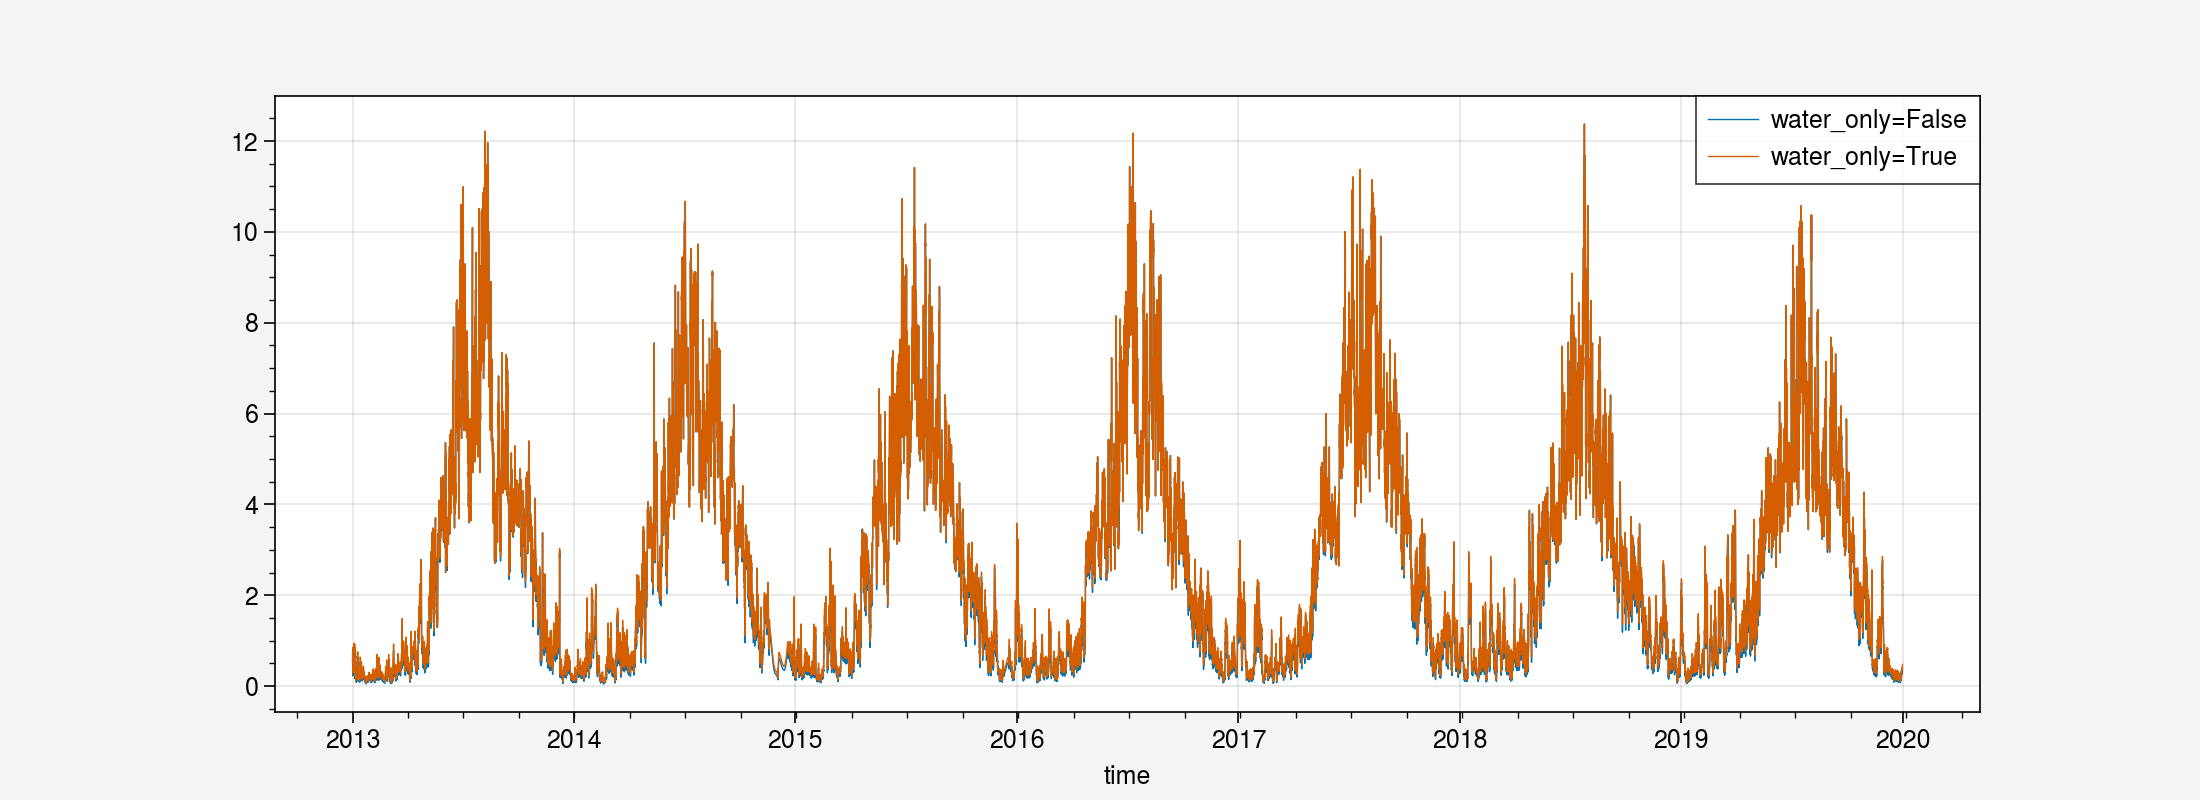

In [25]:
%matplotlib inline

(Qair*1e3).plot(figsize=(11,4), lw=0.5, label='water_only=False')
(Qair_w*1e3).plot(lw=0.5, label='water_only=True')
plt.legend()

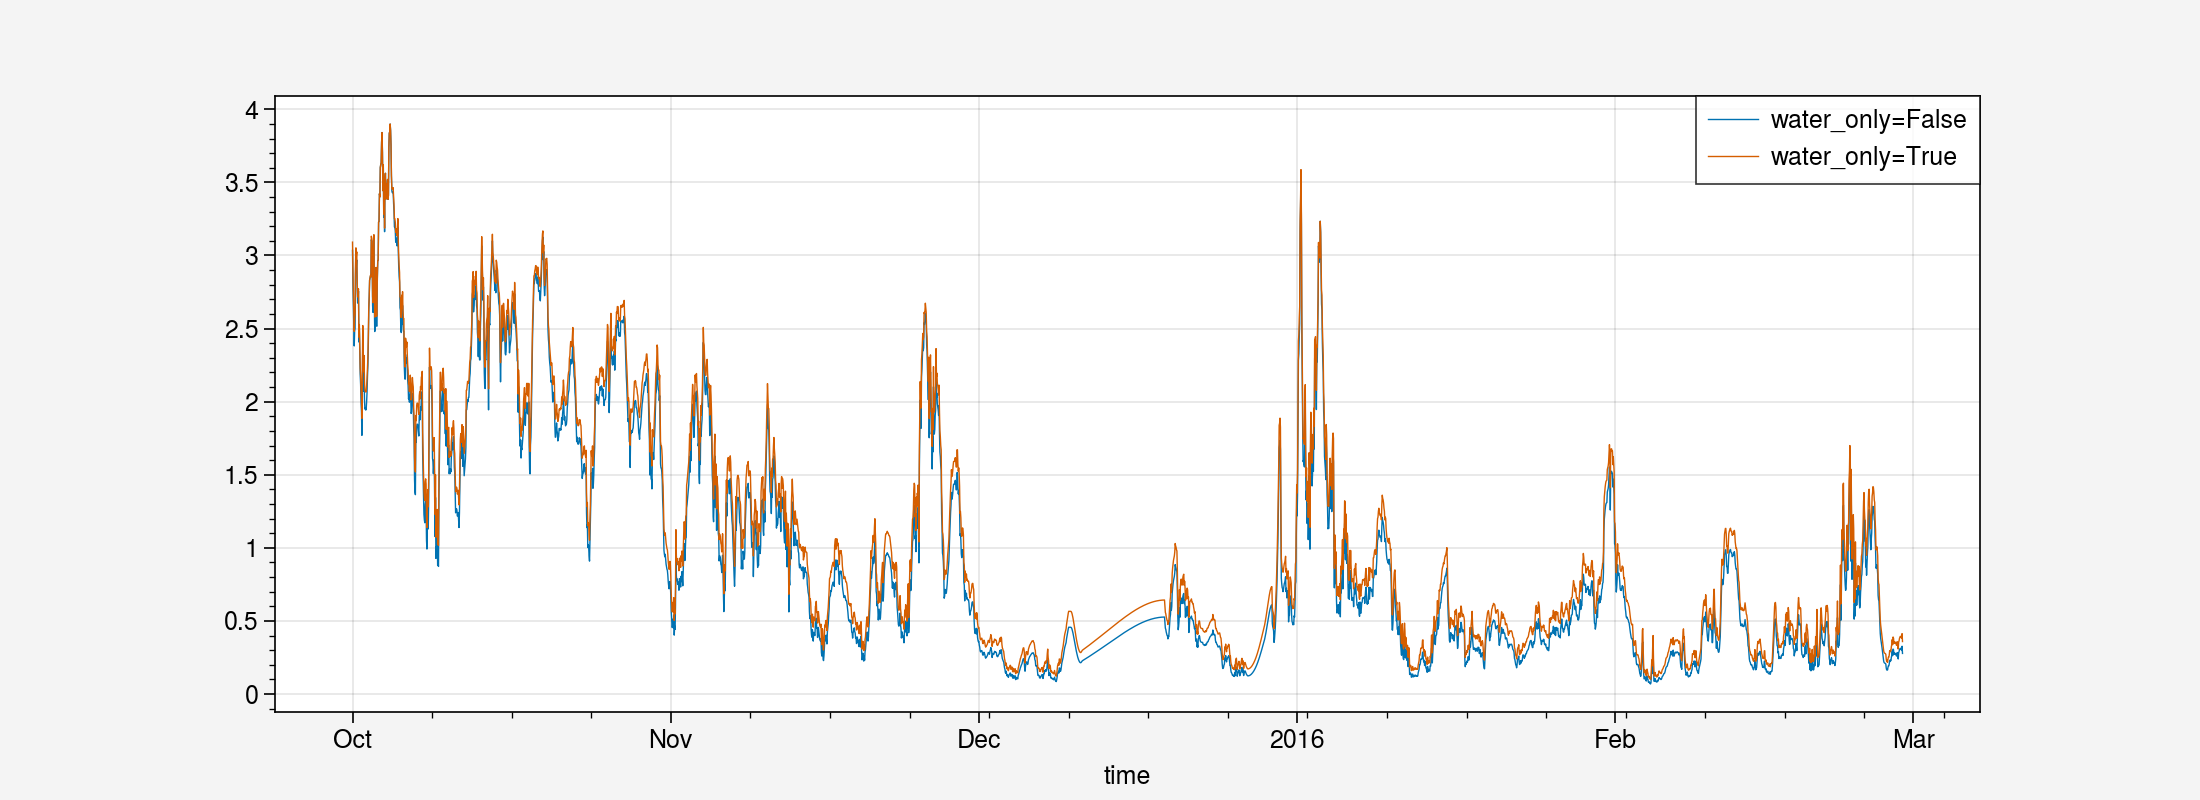

In [54]:
%matplotlib inline

sel_time=slice('2015-10', '2016-02')

(Qair.sel(time=sel_time)*1e3).plot(figsize=(11,4), lw=0.5, label='water_only=False')
(Qair_w.sel(time=sel_time)*1e3).plot(lw=0.5, label='water_only=True')
plt.legend()

In [55]:
# use only water as sensors are calibrated only with respect to water

# ds_forcing['Qair'] = Qair
ds_forcing['Qair'] = Qair_w
ds_forcing['Qair'].attrs = {'name': 'Specific Humidity', 'unit': 'kg/kg'}
ds_forcing

<xarray.Dataset> Size: 4MB
Dimensions:    (time: 61320)
Coordinates:
  * time       (time) datetime64[ns] 491kB 2013-01-01 ... 2019-12-31T23:00:00
Data variables:
    LWdown     (time) float64 491kB 238.0 236.7 234.7 ... 199.7 203.0 200.9
    TotPrecip  (time) float64 491kB 7.936e-06 7.137e-06 7.346e-06 ... 0.0 0.0
    Tair       (time) float64 491kB 254.3 253.9 253.7 ... 249.8 249.8 250.1
    RH         (time) float64 491kB 85.0 85.0 84.0 84.0 ... 78.0 79.0 79.0 79.0
    Wind       (time) float64 491kB 4.167 4.167 3.056 ... 3.611 3.333 3.333
    Psurf      (time) float64 491kB 1.006e+05 1.007e+05 ... 9.874e+04 9.874e+04
    SWdown     (time) float64 491kB 1e-10 1e-10 1e-10 ... 1e-10 1e-10 1e-10
    Qair       (time) float64 491kB 0.000732 0.0007069 ... 0.000469 0.0004774
Attributes:
    Location:     Field site located at Latitude:68.75 Longitude:226.50
    History:      File created by V. R. Dutch in Dec 2020 using TVC Station d...
    Institution:  Northumbria University, UK

https://www.yr.no/en/other-conditions/2-6168373/Canada/Northwest%20Territories/Trail%20Valley%20Creek

Solar noon around 15pm at TVC around June so it seems to be in local time already

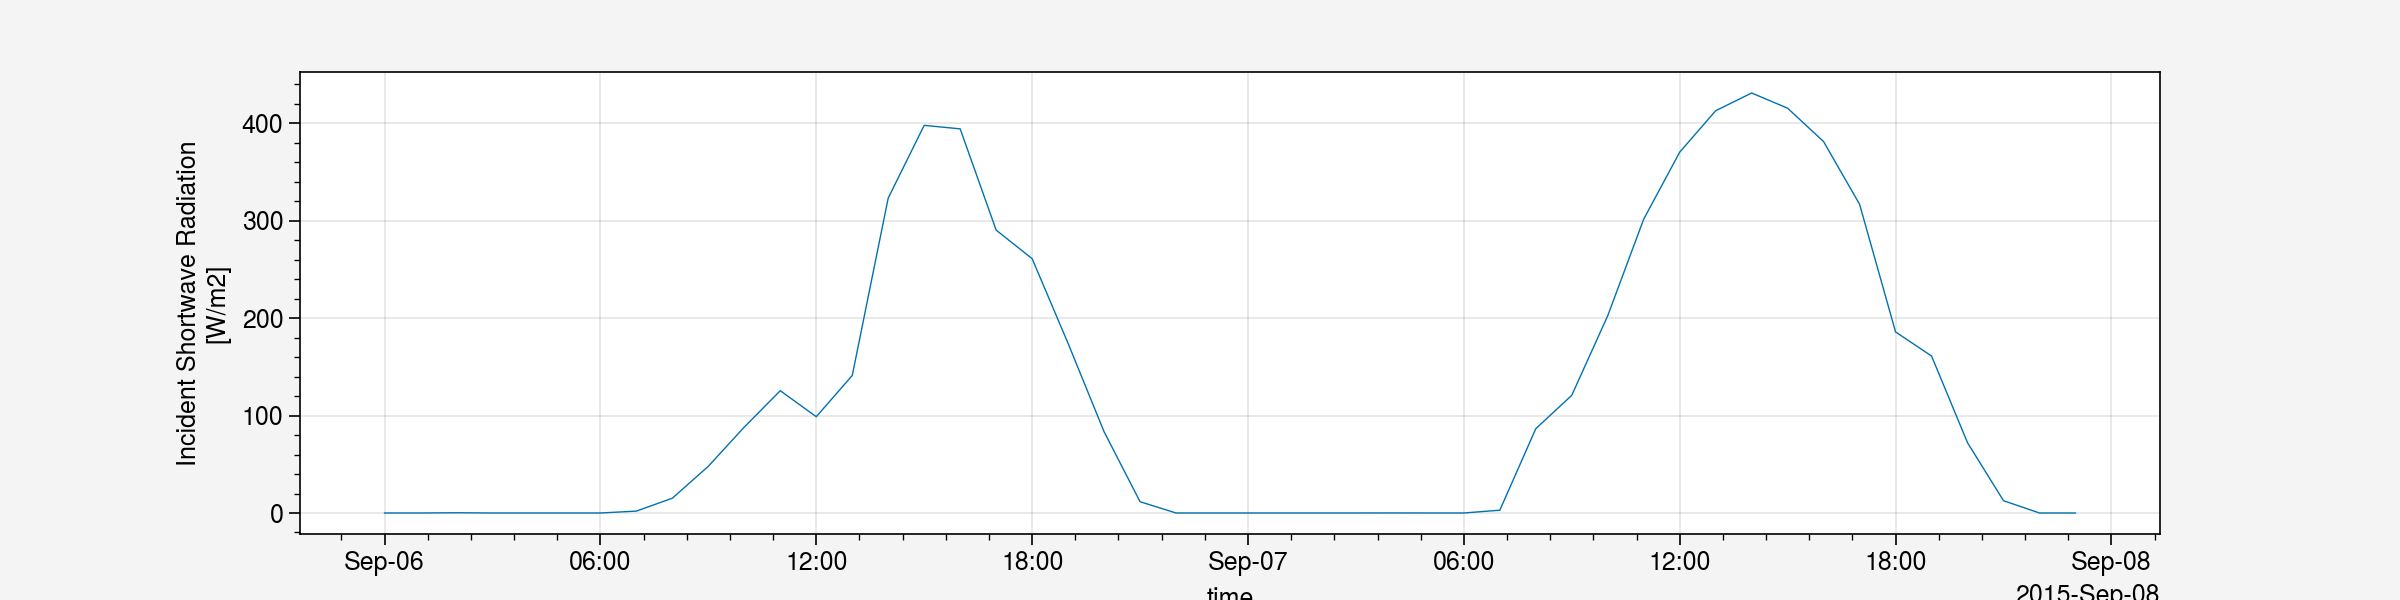

In [56]:
%matplotlib inline
ds_forcing.SWdown.sel(time=slice('2015-09-06','2015-09-07')).plot(figsize=(12,3), lw=0.5)
# plt.xlim('2013-07-05', '2019-05-10')

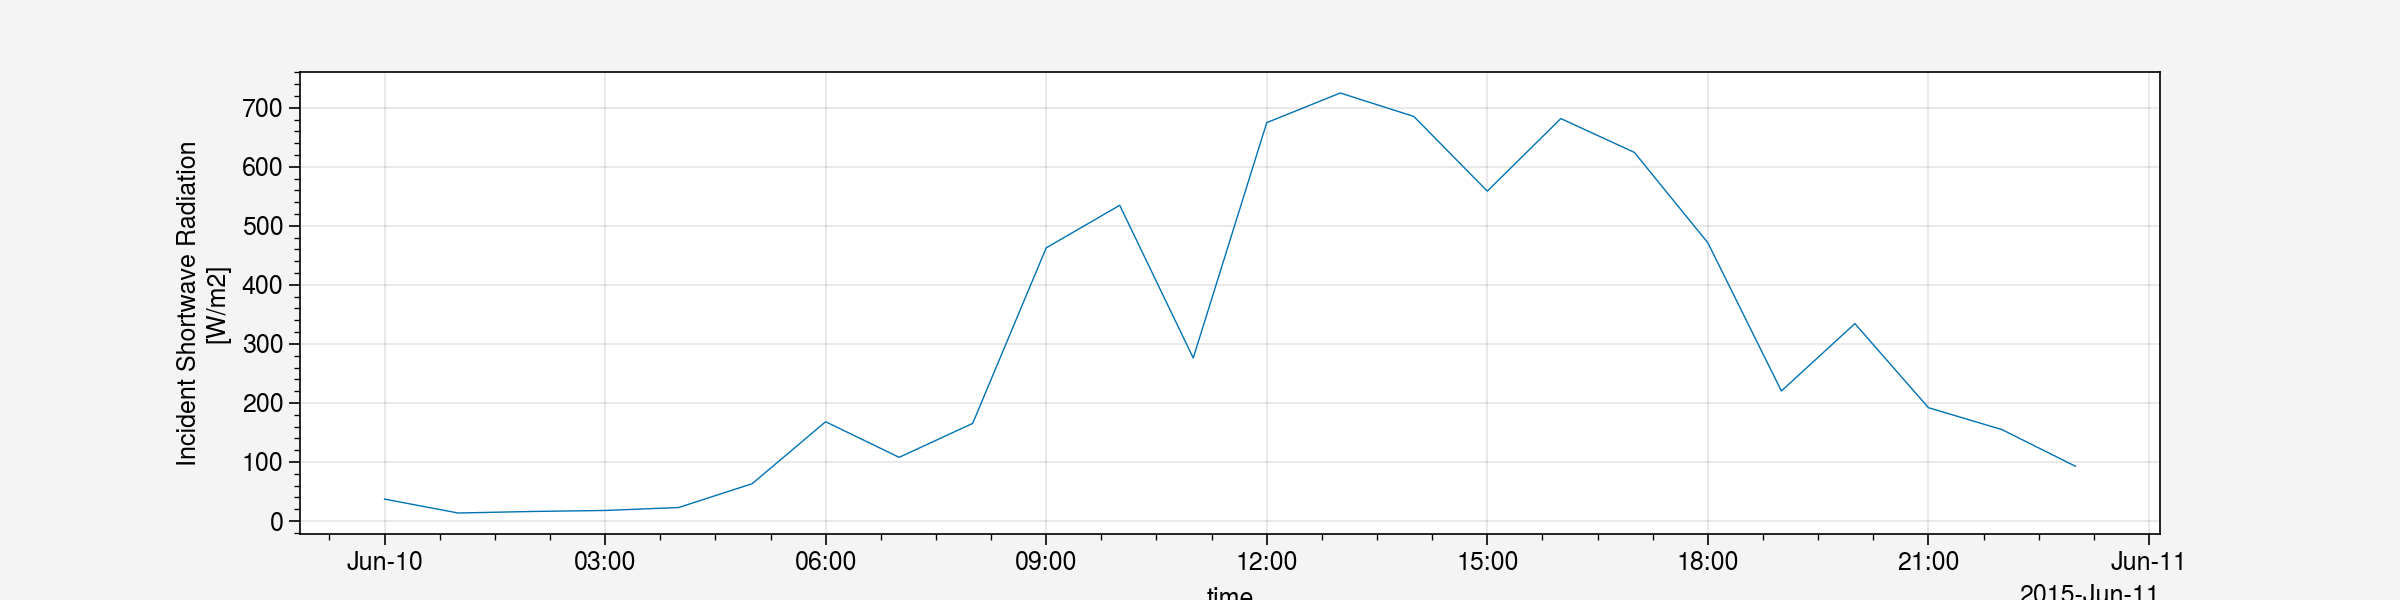

In [52]:
%matplotlib inline
ds_forcing.SWdown.sel(time='2015-06-10').plot(figsize=(12,3), lw=0.5)
# plt.xlim('2013-07-05', '2019-05-10')

In [57]:
path

'/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/TVC/TVCSnowCLM/TVCMetData/CLMInputData'

In [58]:
ds_forcing.to_netcdf(path+'/../met_insitu_tvc_2013_2019_correct_SH.nc')
ds_forcing

<xarray.Dataset> Size: 4MB
Dimensions:    (time: 61320)
Coordinates:
  * time       (time) datetime64[ns] 491kB 2013-01-01 ... 2019-12-31T23:00:00
Data variables:
    LWdown     (time) float64 491kB 238.0 236.7 234.7 ... 199.7 203.0 200.9
    TotPrecip  (time) float64 491kB 7.936e-06 7.137e-06 7.346e-06 ... 0.0 0.0
    Tair       (time) float64 491kB 254.3 253.9 253.7 ... 249.8 249.8 250.1
    RH         (time) float64 491kB 85.0 85.0 84.0 84.0 ... 78.0 79.0 79.0 79.0
    Wind       (time) float64 491kB 4.167 4.167 3.056 ... 3.611 3.333 3.333
    Psurf      (time) float64 491kB 1.006e+05 1.007e+05 ... 9.874e+04 9.874e+04
    SWdown     (time) float64 491kB 1e-10 1e-10 1e-10 ... 1e-10 1e-10 1e-10
    Qair       (time) float64 491kB 0.000732 0.0007069 ... 0.000469 0.0004774
Attributes:
    Location:     Field site located at Latitude:68.75 Longitude:226.50
    History:      File created by V. R. Dutch in Dec 2020 using TVC Station d...
    Institution:  Northumbria University, UK